![](https://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg)

# Project 1: [Titanic](https://www.kaggle.com/c/titanic/data)
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you will exercise your skills with loading data, python data structures, and Pandas to identify charactaristics of Titanic survivors!

---
#### Your goals should be to:
* Practice python programming including loops, conditionals, types, functions, and data structures
* Start thinking critically about manipulating, organizing, and interpreting data
* Troubleshoot errors

---
#### Getting Started:
* **fork** the repository on git.generalassemb.ly
* **clone** your forked repo

---
#### Submission:
* You should be working on a **fork** of the GA project one repository. 
* Use **git** to manage versions of your project. Make sure to `add`, `commit`, and `push` your changes to **your fork** of the github 
* Submit a link to your project repository in the submission form by **Friday, 9/29 11:59 PM**. You will then receive the solutions.
* Create a copy of your original notebook (file > make a copy in jupyter notebook)
* In the copy, use the solutions to correct your work. Make sure to take note of your successes and struggles. Did you learn anything new from correcting your work?
* Submit the corrected version by **Sunday, 10/1 11:59 PM** to receive instructor feedback on your work. ***Projects submitted after this deadline will not receive instructor feedback.***

### Considerations:

* You will be generating long data strutures- avoid displaying the whole thing. Display just the first or last few entries and look at the length or shape to check whether your code gives you back what you want and expect.
* Make functions whenever possiblle!
* Be explicit with your naming. You may forget what `this_list` is, but you will have an idea of what `passenger_fare_list` is. Variable naming will help you in the long run!
* Don't forget about tab autocomplete!
* Use markdown cells to document your planning, thoughts, and results. 
* Delete cells you will not include in your final submission
* Try to solve your own problems using this framework:
  1. Check your spelling
  2. Google your errors. Is it on stackoverflow?
  3. Ask your classmates
  4. Ask a TA or instructor
* Do not include errors or stack traces (fix them!)

# 1. Using the `with open()` method in the `csv` library, load the titanic dataset into a list of lists.

* The `type()` of your dataset should be `list`
* The `type()` of each element in your dataset should also be `list`
* The `len()` of your dataset should be 892 (892 rows, including the header)
* The `len()` of each row element in your dataset should be have a `len()` of 12
* Print out the first 3 rows including the header to check your data.

In [9]:
import csv
from IPython.display import display
import numpy as np
import pandas as pd


In [13]:
with open('titanic.csv') as file:
    reader= csv.reader(file) #create iterable object, csv.reader takes care of new line and "" quoted inside fields
    titanic=[]
    for line in reader:
        titanic.append(line)

# print(reader)
# tita = pd.DataFrame(titanic)  you can nto convert into df without converting the reader into a list or dictionary.      
# tita.head()     
print(titanic[:3])
    
print(len(titanic))
print(len(titanic[1]))



,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


#### 2. Separate the first header row from the rest of your dataset. 

* The header should be a list of the column names
* The data should be the rest of your data
* Display the header and the first row of the dataset zipped together using `zip`
* Your result should look like...


```
[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ...
 ('Embarked', 'S')]
 ```

In [15]:
# Your code here
header = titanic[0]

data = titanic[1:]
titanic_list =[]
for rows in data:
    row = list(zip(header, rows))
    titanic_list.append(row)
print(titanic_list)

# print(header)

[[('PassengerId', '1'), ('Survived', '0'), ('Pclass', '3'), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', '22'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'A/5 21171'), ('Fare', '7.25'), ('Cabin', ''), ('Embarked', 'S')], [('PassengerId', '2'), ('Survived', '1'), ('Pclass', '1'), ('Name', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'), ('Sex', 'female'), ('Age', '38'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'PC 17599'), ('Fare', '71.2833'), ('Cabin', 'C85'), ('Embarked', 'C')], [('PassengerId', '3'), ('Survived', '1'), ('Pclass', '3'), ('Name', 'Heikkinen, Miss. Laina'), ('Sex', 'female'), ('Age', '26'), ('SibSp', '0'), ('Parch', '0'), ('Ticket', 'STON/O2. 3101282'), ('Fare', '7.925'), ('Cabin', ''), ('Embarked', 'S')], [('PassengerId', '4'), ('Survived', '1'), ('Pclass', '1'), ('Name', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'), ('Sex', 'female'), ('Age', '35'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', '113803'), ('Fare', '53.1'), ('Cabin', 'C123'),

# 3. Using a `for` loop, load your data into a `dict` called `data_dict`.

* The keys of your `data_dict` should be `PassengerId`
* The values of your `data_dict` should be dictionaries...
  * Each of these dictionaries should reperesent a column value within a row
  * The keys should be the names of the columns
  * The values should be the values of that column
  
The beginning of your `data_dict` should look like: 

    {'1': {'Age': '22',
      'Cabin': '',
      'Embarked': 'S',
      'Fare': '7.25',
      'Name': 'Braund, Mr. Owen Harris',
      'Parch': '0',
      'Pclass': '3',
      'Sex': 'male',
      'SibSp': '1',
      'Survived': '0',
      'Ticket': 'A/5 21171'},
     '10': {'Age': '14',
      'Cabin': '',
      'Embarked': 'C',
      'Fare': '30.0708',
      'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
      'Parch': '0',
      'Pclass': '2',
      'Sex': 'female',
      'SibSp': '1',
      'Survived': '1',
      'Ticket': '237736'},
      ...
      }

# 4. Repeat step 3 using a dictionary comprehension.

* Using `==`, check if your `data_dict` from your `for` loop is the same as the one from your dictionary comprehension.

In [20]:
passenger_dict=[] 
for i in range(len(titanic_list)):
    a = dict(titanic_list[i])
    passenger_dict.append(a)

# print(passenger_dict)

# print(titanic_list[-1])
data_dict = {}
for i in range(len(titanic_list)):
    passenger_dict = dict(titanic_list[i])
#     print(titanic_list[i][0])
    data_dict[titanic_list[i][0][1]] = passenger_dict

        


# data_dict['1']
# print(data_dict[titanic_list[0][0][1]])
    
print(data_dict['46'])   

{'PassengerId': '46', 'Survived': '0', 'Pclass': '3', 'Name': 'Rogers, Mr. William John', 'Sex': 'male', 'Age': '', 'SibSp': '0', 'Parch': '0', 'Ticket': 'S.C./A.4. 23567', 'Fare': '8.05', 'Cabin': '', 'Embarked': 'S'}


In [18]:
# Your code here
# data_dict[titanic_list[i][0][1]] = passenger_dict[i]
# new_pd_dict_columns = {
#     col_name:[single_poke_dict[col_name] for poke_id, single_poke_dict in new_pd_dict.items()] for col_name in header}


data_dict_comp = {titanic_list[i][0][1] : {u : v for u,v in passenger_dict[i].items()} for i in range(len(titanic_list))}
data_dict_comp

KeyError: 0

# 5. Transform your `data_dict` to be oriented by column and call it `data_dict_columns`

* Currently, our `data_dict` is oriented by row, indexed by `"PassengerId"`. 
* Transform your data so that the title of each row is a key, the values are of type `list` and represent column vectors.

If you display `data_dict_columns`, the beginning should look like...

    {'Age': ['25',
      '36',
      '24',
      '40',
      '45',
      '2',
      '24',
      '28',
      '33',
      '26',
      '39',
      ...

In [21]:
data_dict_columns = {}

for col in header:
    data_dict_columns[col] =[]
print(data_dict_columns)
 

for i, j in data_dict.items():
    for u, v in j.items():
        data_dict_columns[u].append(v)
# print((pokedex_dict_column['Attack'][0:10]))
print(data_dict_columns["PassengerId"])

{'PassengerId': [], 'Survived': [], 'Pclass': [], 'Name': [], 'Sex': [], 'Age': [], 'SibSp': [], 'Parch': [], 'Ticket': [], 'Fare': [], 'Cabin': [], 'Embarked': []}
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135

# 6. Data Types

What is the current `type` of each column? What do you think the data type of each column *should* be? The data types in Python are...

* `int`
* `float`
* `str`
* `bool`
* `tuple`
* `list`
* `dict`
* `set`

In a markdown cell, describe what each column represents and what the `type` of each value should be. **Extra:** If you want to be fancy, use a [markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) to display your results.

The datatype of the elements inside each column is string. 
PassengerId, SibSp, Parch should be int type
Age, Fare should be float type 
Survived, Pclass can be str or int type as they are only categories, the number does not mean anything numerically.
Embarked, Name, Sex, Ticket, Cabin should be str

In [22]:
print(type(data_dict_columns["Sex"][1]))
data_dict_columns["Sex"][1]


<class 'str'>


'female'

#### Your answer here (double click here to edit this markdown cell, and press shift-enter exit edit mode!):


# 7. Transform each column to the appropriate type if needed.

Build a function called `transform_column` that takes arguments for a `data_dict`, `column_name`, and `datatype`, and use it to transofm the columns that need transformation.

**NOTE:** There are values in this dataset that cannot be directly cast to a numerical value. Use `if/then` or `try/except` statements to handle errors. 

**To help identify potential sources of errors, explore the `set` of values in each column.**

In [23]:
def transform_column(data_dictionary_column, column_name, datatype):
    for i in range(len(data_dictionary_column[column_name])):
        try:
            data_dictionary_column[column_name][i] = int(data_dictionary_column[column_name][i])
        except:
            data_dictionary_column[column_name][i] = np.nan 
    
    
    #this functionis converting floats to nan also hence deleting values in Age colum which has float,int and nan
                                                            #explanation needed 
# transform_column(data_dict_columns, "Age", "integer")        

transform_column(data_dict_columns, "PassengerId", "integer")

transform_column(data_dict_columns, "Survived", "integer")

transform_column(data_dict_columns, "Pclass", "integer")

transform_column(data_dict_columns, "SibSp", "integer")

transform_column(data_dict_columns, "Parch", "integer")

print(type(data_dict_columns['Parch'][100]))


def transform_column2(data_dictionary_column, column_name, datatype):
    for i in range(len(data_dictionary_column[column_name])):
        try:
            data_dictionary_column[column_name][i] = float(data_dictionary_column[column_name][i])
        except:
            data_dictionary_column[column_name][i] = np.nan 
        
transform_column2(data_dict_columns, "Fare", "float")
print(type(data_dict_columns['Fare'][100]))
print(data_dict_columns['Age'][:60])



<class 'int'>
<class 'float'>
['22', '38', '26', '35', '35', '', '54', '2', '27', '14', '4', '58', '20', '39', '14', '55', '2', '', '31', '', '35', '34', '15', '28', '8', '38', '', '19', '', '', '40', '', '', '66', '28', '42', '', '21', '18', '14', '40', '27', '', '3', '19', '', '', '', '', '18', '7', '21', '49', '29', '65', '', '21', '28.5', '5', '11']


In [24]:
transform_column2(data_dict_columns, "Age", "float")
print(data_dict_columns['Age'][:60])

[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, nan, 31.0, nan, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 28.0, 42.0, nan, 21.0, 18.0, 14.0, 40.0, 27.0, nan, 3.0, 19.0, nan, nan, nan, nan, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, nan, 21.0, 28.5, 5.0, 11.0]


# 8. Build functions to calculate the mean, sample standard deviation, and median of a list of ints or floats. Use `scipy.stats.mode` or build your own mode function!


If you filled any missing values with `np.NaN`, you may need to handle that in your functions (look up `np.isnan()`).

If building a `mode` function is too difficult, you import mode from `scipy.stats` using `from scipy.stats import mode`.

**Optional:**  Build a function for calculating the Mode that returns the mode value *and* the count of that value. Mode is tricky, so start by building a function that counts the occurances of each value. You may also need to sort using a `key` with a `lambda function` inside. You may also find a `defaultdict` useful.

Mean

In [25]:
from scipy.stats import mode


def this_mean(data_list):
    sum_data=0
    count= 0
    for i in range(len(data_list)):
        if np.isnan(data_list[i]) == True:
            pass
        else:
            sum_data = sum_data + data_list[i]
            count = count + 1
#     print(sum_data)  
#     print(count)
    mean_data = sum_data/float(count)
    return mean_data

this_mean(data_dict_columns["Age"]) # giving differnt value than Excel, 
# this_mean(data_dict_columns["Survived"])
# this_mean(data_dict_columns["SibSp"])



29.69911764705882

Standard Deviation

In [30]:
def this_std(data_list):
    std_data = []
    for i in range(len(data_list)):
        if np.isnan(data_list[i]) == True:
            pass
        else:
            std_data.append(data_list[i])
            
    return np.std(std_data)

this_std(data_dict_columns["Age"])

14.516321150817316

Median

In [34]:
def this_median(data_list):
    a=[]
    for i in range(len(data_list)):
        if np.isnan(data_list[i]) == True:
            pass
        else:
            a.append(data_list[i])
            
    return np.median(a)


this_median(data_dict_columns["Age"])

28.0

Mode

In [35]:
def this_mode(data_list):
    data_mode= mode(data_list)
    return data_mode

this_mode(data_dict_columns["Age"])

ModeResult(mode=array([ 24.]), count=array([30]))

# 9. Summary Statistics of Numerical Columns

For numerical columns, what is the mean, standard deviation, mean, and mode for that data? Which measure of central tendency is the most descriptive of each column? Why? Explain your answer in a markdown cell.

In [100]:
# Your code here
print(this_mean(data_dict_columns["Age"]), this_std(data_dict_columns["Age"]), this_median(data_dict_columns["Age"]), this_mode(data_dict_columns["Age"]))


29.69911764705882 14.5163211508 28.0 ModeResult(mode=array([ 24.]), count=array([30]))


In [101]:
print(this_mean(data_dict_columns["Fare"]), this_std(data_dict_columns["Fare"]), this_median(data_dict_columns["Fare"]), this_mode(data_dict_columns["Fare"]))


32.2042079685746 49.6655344448 14.4542 ModeResult(mode=array([ 8.05]), count=array([43]))


In [102]:
print(this_mean(data_dict_columns["SibSp"]), this_std(data_dict_columns["SibSp"]), this_median(data_dict_columns["SibSp"]), this_mode(data_dict_columns["SibSp"]))


0.5230078563411896 1.10212443509 0.0 ModeResult(mode=array([0]), count=array([608]))


In [103]:
print(this_mean(data_dict_columns["Parch"]), this_std(data_dict_columns["Parch"]), this_median(data_dict_columns["Parch"]), this_mode(data_dict_columns["Fare"]))


0.38159371492704824 0.805604761245 0.0 ModeResult(mode=array([ 8.05]), count=array([43]))


In [104]:
print(this_mean(data_dict_columns["Sex"]), this_std(data_dict_columns["Sex"]), this_median(data_dict_columns["Sex"]), this_mode(data_dict_columns["Sex"]))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Your markdown response here

# 10. Splitting the Data to Predicting Survival

For all the passengers in the dataset, the mean survival rate is around .38 (38% of the passengers survived). From our data, we may be able to profile who survived and who didn't!

Split the data by pclass. Does the class a passenger was in affect survivability? You can do this by:
* Creating a list of `True` and `False` values conditional on a column's value
* Taking the mean of the `Survived` column where those values are `True`

In [36]:
count_survived = 0
for i in range(len(data_dict_columns["Survived"])):
    if data_dict_columns["Survived"][i] == 1:
        count_survived = count_survived +1
print(count_survived)


342


In [37]:
list(zip(data_dict_columns["Pclass"],data_dict_columns['Survived']))


[(3, 0),
 (1, 1),
 (3, 1),
 (1, 1),
 (3, 0),
 (3, 0),
 (1, 0),
 (3, 0),
 (3, 1),
 (2, 1),
 (3, 1),
 (1, 1),
 (3, 0),
 (3, 0),
 (3, 0),
 (2, 1),
 (3, 0),
 (2, 1),
 (3, 0),
 (3, 1),
 (2, 0),
 (2, 1),
 (3, 1),
 (1, 1),
 (3, 0),
 (3, 1),
 (3, 0),
 (1, 0),
 (3, 1),
 (3, 0),
 (1, 0),
 (1, 1),
 (3, 1),
 (2, 0),
 (1, 0),
 (1, 0),
 (3, 1),
 (3, 0),
 (3, 0),
 (3, 1),
 (3, 0),
 (2, 0),
 (3, 0),
 (2, 1),
 (3, 1),
 (3, 0),
 (3, 0),
 (3, 1),
 (3, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (1, 1),
 (2, 1),
 (1, 0),
 (1, 1),
 (2, 1),
 (3, 0),
 (2, 1),
 (3, 0),
 (3, 0),
 (1, 1),
 (1, 0),
 (3, 0),
 (1, 0),
 (3, 1),
 (2, 1),
 (3, 0),
 (3, 1),
 (3, 0),
 (2, 0),
 (3, 0),
 (2, 0),
 (3, 0),
 (3, 1),
 (3, 0),
 (3, 0),
 (3, 0),
 (2, 1),
 (3, 1),
 (3, 0),
 (3, 1),
 (3, 1),
 (1, 0),
 (2, 1),
 (3, 1),
 (3, 0),
 (3, 0),
 (1, 1),
 (3, 0),
 (3, 0),
 (3, 0),
 (1, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (1, 0),
 (1, 1),
 (2, 1),
 (2, 0),
 (3, 0),
 (3, 0),
 (1, 0),
 (3, 0),
 (3, 0),
 (3, 0),
 (3, 1),
 (3, 1),
 (3, 0),
 (3, 1),
 (1, 0),
 

In [38]:
Pclass_survived = list(zip(data_dict_columns["Pclass"],data_dict_columns['Survived']))
Pclass3_survived = Pclass_survived.count((3,1))/(Pclass_survived.count((3,0)) + Pclass_survived.count((3,1)))
Pclass2_survived = Pclass_survived.count((2,1))/(Pclass_survived.count((2,0)) + Pclass_survived.count((2,1)))
Pclass1_survived = Pclass_survived.count((1,1))/(Pclass_survived.count((1,0)) + Pclass_survived.count((1,1)))

print(Pclass3_survived, Pclass2_survived, Pclass1_survived)

0.24236252545824846 0.47282608695652173 0.6296296296296297


In [51]:
# Pclass_survived = list(zip(data_dict_columns["Pclass"],data_dict_columns['Survived']))
# a = Pclass_survived.count((1,0))
# print(a)



80


In [34]:
# Your code here

# 11. Independent Work

Use the techniques from step 10 to make different conditional splits in the `Survived` column. Can you find a combination of splits that maximizes the survival rate?

In [61]:
# Your code here
Sex_survived = list(zip(data_dict_columns["Sex"],data_dict_columns['Survived']))
female_survived = Sex_survived.count(('female',1))/(Sex_survived.count(('female',0)) + Sex_survived.count(('female',1)))
male_survived = Sex_survived.count(('male',1))/(Sex_survived.count(('male',0)) + Sex_survived.count(('male',1)))

print(female_survived, male_survived)

0.7420382165605095 0.18890814558058924


In [64]:
set(data_dict_columns['Embarked'])

Embarked_survived = list(zip(data_dict_columns["Embarked"],data_dict_columns['Survived']))
C_survived = Embarked_survived.count(('C', 1))/(Embarked_survived.count(('C', 1)) + Embarked_survived.count(('C', 0)))
Q_survived = Embarked_survived.count(('Q', 1))/(Embarked_survived.count(('Q', 1)) + Embarked_survived.count(('Q', 0)))
S_survived = Embarked_survived.count(('S', 1))/(Embarked_survived.count(('S', 1)) + Embarked_survived.count(('S', 0)))
print(C_survived, Q_survived, S_survived)

0.5535714285714286 0.38961038961038963 0.33695652173913043


In [94]:
Age_survived = list(zip(data_dict_columns["Age"],data_dict_columns['Survived']))
Age_survived_above_30 = [survived for age, survived in Age_survived if age < 60 and age > 40]
Age_survived_below_30 = [survived for age, survived in Age_survived if age < 60]
print(sum(Age_survived_above_30)/len(Age_survived_above_30), sum(Age_survived_below_30)/len(Age_survived_below_30))

0.2692307692307692 0.4113372093023256


# 12. Distributions

### A) For each of your numeric features, use `pyplot` subplots to plot a hisogram for each feature.

* Make sure to title each subplot.
* If you get an error, it may be caused by `np.NaN`

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


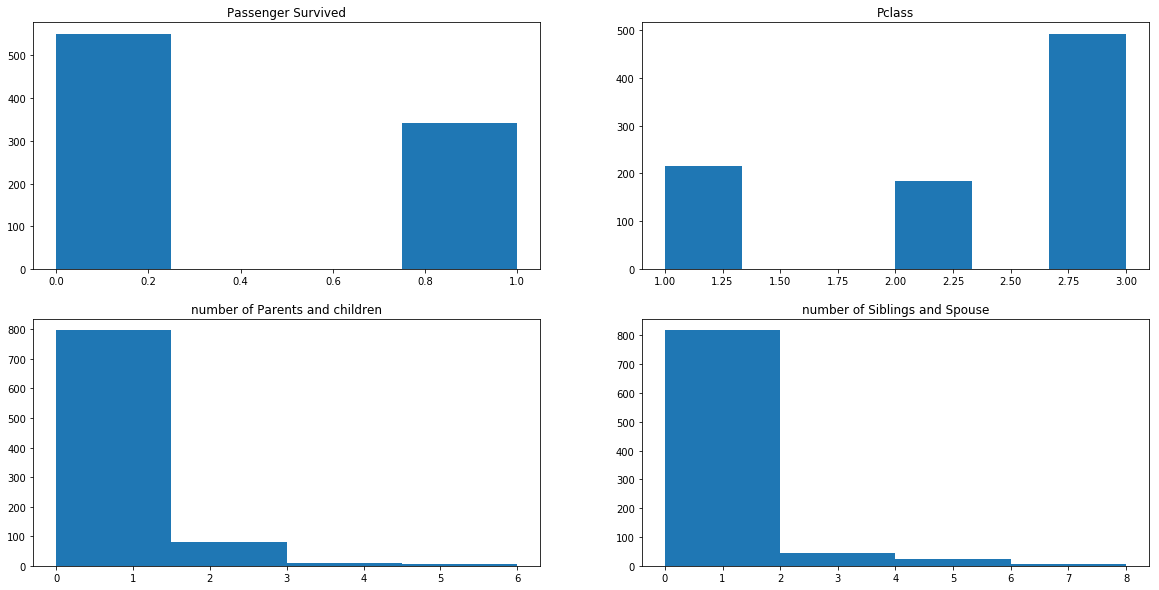

In [97]:
# Your code here
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax[0,0].hist(data_dict_columns['Survived'], bins =4)
ax[0,0].title.set_text("Passenger Survived")
ax[0,1].hist(data_dict_columns['Pclass'], bins= 6)
ax[0,1].title.set_text('Pclass')
ax[1,0].hist(data_dict_columns['Parch'], bins =4)
ax[1,0].title.set_text('number of Parents and children')
ax[1,1].hist(data_dict_columns['SibSp'], bins =4)
ax[1,1].title.set_text('number of Siblings and Spouse')

# plt.hist(data_dict_columns['Survived'])

### B) for each of these values, what's the 90% confidence interval of the population mean?

* Create a function to find the confidence interval, and use it on each of the numeric columns.
* What's your interpretation of the interval?

In [46]:
from scipy import stats
# Your code here

# 13. Pandas

### A: Load the titanic csv into a `DataFrame` using `pd.read_csv()`

In [47]:
import pandas as pd

In [48]:
titanic_df = pd.read_csv('titanic.csv')

### B: Display the first 5 rows, the last 4 rows, and a sample of 3 rows.

In [49]:
# Your code here
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### C: Create a row mask that is `True` when `Pclass == 3`. Use this to mask your `DataFrame`. Find the mean of the `Survived` column. Is it the same as what we calculated in part 10?

In [51]:
pclass3_mask = titanic_df[titanic_df["Pclass"] == 3]
pclass2_mask = titanic_df[titanic_df["Pclass"] == 2]
pclass1_mask = titanic_df[titanic_df["Pclass"] == 1]
print(pclass3_mask["Survived"].mean(), pclass2_mask["Survived"].mean(), pclass1_mask["Survived"].mean())


0.242362525458 0.472826086957 0.62962962963


### D: Using a `.groupby()`, what is the mean of the survival column grouped by `Pclass` and `Sex`. What are your observations?

In [52]:
# Your code here
titanic_df.groupby(["Pclass","Sex"])['Survived'].mean()
# pclass2_mask.groupby("Sex").mean()
# pclass1_mask.groupby("Sex").mean()



Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### E: Survival Rate by Age Range:  `pd.cut()` takes two arguments: A `list`, `Series`, or `array`, and a list of bins. Create a new column in your `DataFrame` using `pd.cut()` that groups your ages into bins of 5 years. Then, use `.groupby()` to display the survival rate and count for each age group

In [79]:
# Your code here
titanic_df['Age'].max()
# bins =[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
bins = list(range(0, 81, 5))
# bins = np.arange(titanic_df["Age"].min(), titanic_df["Age"].max()+1, 5)
pd.cut(titanic_df["Age"], bins)
titanic_df["Age bin"] = pd.cut(titanic_df["Age"], bins)
titanic_df.groupby("Age bin")["Survived"].count()

0      (20, 25]
1      (35, 40]
2      (25, 30]
3      (30, 35]
4      (30, 35]
5           NaN
6      (50, 55]
7        (0, 5]
8      (25, 30]
9      (10, 15]
10       (0, 5]
11     (55, 60]
12     (15, 20]
13     (35, 40]
14     (10, 15]
15     (50, 55]
16       (0, 5]
17          NaN
18     (30, 35]
19          NaN
20     (30, 35]
21     (30, 35]
22     (10, 15]
23     (25, 30]
24      (5, 10]
25     (35, 40]
26          NaN
27     (15, 20]
28          NaN
29          NaN
         ...   
861    (20, 25]
862    (45, 50]
863         NaN
864    (20, 25]
865    (40, 45]
866    (25, 30]
867    (30, 35]
868         NaN
869      (0, 5]
870    (25, 30]
871    (45, 50]
872    (30, 35]
873    (45, 50]
874    (25, 30]
875    (10, 15]
876    (15, 20]
877    (15, 20]
878         NaN
879    (55, 60]
880    (20, 25]
881    (30, 35]
882    (20, 25]
883    (25, 30]
884    (20, 25]
885    (35, 40]
886    (25, 30]
887    (15, 20]
888         NaN
889    (25, 30]
890    (30, 35]
Name: Age, dtype: catego

Age bin
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Survived, dtype: int64

In [77]:
titanic_df.groupby("Age bin")["Survived"].mean()

Age bin
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
Name: Survived, dtype: float64

# 14. Hypothesis Testing

### A) Hypothesis:

Create a null and alternate hypothesis to ask the following quesiton: Was the `Age` of survivors different from that of people who didn't survive?

**Hypotheses:**

$H_0$: There is no difference between the mean age of the passengers who survived and the mean age of the passenger who did not survive.

$H_1$: There is a difference between the mean age of the passengers who survived and the mean age of the passenger who did not survive.

### B) T-Testing

Use a t-test to test your null hypothesis. What's the p-value? What's your interpretation? Do you accept or reject your null hypothesis? What does this mean in terms of `Age`?

In [115]:
from scipy import stats
ttest = stats.ttest_ind
titanic_survived = titanic_df[titanic_df["Survived"] == 1]["Age"].dropna()
titanic_dead = titanic_df[titanic_df["Survived"] == 0]["Age"].dropna()


In [116]:
# Your code here
titanic_survived = titanic_df[titanic_df["Survived"] == 0]["Age"].dropna()
titanic_dead = titanic_df[titanic_df["Survived"] == 1]["Age"].dropna()
ttest = stats.ttest_ind(titanic_survived, titanic_dead)
ttest

Ttest_indResult(statistic=2.0666869462538102, pvalue=0.039124654013482488)

I do not accept the null hypothesis as it is too close to 0.05. This means that the age of the passenger does not have any affect on their survival.

# 13. Write-up

Use markdown cells to answer the following questions:

1. What is the main difference between a list and a tuple?
2. Can you iterate over a dictionary? If so, how?
3. What is the term for a list or array of `True` and `False` values used to select certain rows or columns in a `DataFrame`?
4. If you have a continuous variable, when would the median be a better descriptor than the mean? Why?
5. Give a qualitative description of the survivors of the titanic based on the effects of your splits in the data on survival rate. Or, given a row, what columns would you look at to guess if they survived?


1) a List is mutable object and Tuple is immutable. hence tuple has no append, sort, replace methods assocated with it as these operation scan not happen with tuple.
2) Dictioanaries ca be sorted either by iterating over there items or keys or even values.
   ex: for i,j in dict.items()
3) Mask which a boolean array created out of certain condition applied on DataFrame.
4) In situations where the distributions are not centered, that means if they are skewed towards right or left. In these cases the mean will not be accurate measure on the populatin percentiles. Mediam will provide better measure.


Your markdown response here.

# 14. Evaluation

Please use markdown cells to submit your responses. 

1. What was easy for you in this project?
   Converting datatypes, creating the easy statistical functions
2. What was difficult?
   reading the csv files and all the different functions like read, readline do and how to read the files correctly. I also am finding it hard to plot multiple aplots together and loopign through them.
3. Where did you make the most improvement?
 Definitely iterating through dict and lists has improved. I am able to slice and work on conditions on DataFrames
4. Where would you like to improve?
   More visualization and understanding the row and column vector. I also am struggling with writing functions that return function as objects and yo have use them on data. 